In [8]:
import numpy as np
import pandas as pd
from scipy.special import hermite
from scipy.special import factorial
from scipy.optimize import curve_fit

import math
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib import colormaps
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LinearSegmentedColormap, Normalize

import netCDF4 as nc

In [3]:
# Path to your CDF file
file_path = '../data/2023_Jupyter_lab_data/62db094e6c04570e4e0493de.cdf'

try:
    # Open the CDF file
    cdf_file = nc.Dataset(file_path, 'r')
    print("File opened successfully")

    # Get the general information about the file
    print(cdf_file)

    # Extracting basic information like dimensions, variables, and global attributes
    dimensions = {dim: len(cdf_file.dimensions[dim]) for dim in 
cdf_file.dimensions}
    variables = {var: cdf_file.variables[var].shape for var in 
cdf_file.variables}
    global_attributes = {attr: cdf_file.getncattr(attr) for attr in 
cdf_file.ncattrs()}

    print("Dimensions:", dimensions)
    print("Variables:", variables)
    print("Global Attributes:", global_attributes)

    cdf_file.close()
except Exception as e:
    print(f"Error: {e}")

File opened successfully
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    name: 0722_trans_dist strange_neg
    date: 2022-07-22 15:32:14.651000
    MOT_freq_ss: 23.0
    MOT_pwr_ss: 4.5
    REP_pwr_ss: 4.0
    MOTcoil_curr_ss: 2.0
    BiasX_ss: -0.055
    BiasY_ss: -0.092
    BiasZ_ss: -0.085
    Loading_time_us: 1000000.0
    Release_time_ms: 100.0
    pgc_switch: 1.0
    MOT_freq_PGC: 100.0
    MOT_pwr_PGC: 3.2
    REP_pwr_PGC: 4.0
    BiasX_PGC: -0.075
    BiasY_PGC: -0.16
    BiasZ_PGC: -0.025
    Sweep_time: 2000.0
    PGC_time_us: 5000.0
    lattice_switch: 1.0
    LAT1_freq: 80.0
    LAT2_freq: 80.0
    LAT1_gain: 3.8
    LAT2_gain: 3.7
    Lat1_ss: 3.8
    Lat2_ss: 3.7
    Lattice_load_time_ms: 2.0
    transport_switch: 1.0
    bring_back_switch: 1.0
    trans_accel_ms2: 1000.0
    trans_max_detuning_MHz: 6.0
    trans_hold_time_ms: 500.0
    imaging_switch: 1.0
    expansion_lattice_switch: 0.0
    MOT_freq_imag: 15.0
 

In [20]:
# Print all global attributes
for attr in cdf_file.ncattrs():
    print(f"{attr}: {getattr(dataset, attr)}")

name: /
date: 2022-07-22 15:32:14.651000
MOT_freq_ss: 23.0
MOT_pwr_ss: 4.5
REP_pwr_ss: 4.0
MOTcoil_curr_ss: 2.0
BiasX_ss: -0.055
BiasY_ss: -0.092
BiasZ_ss: -0.085
Loading_time_us: 1000000.0
Release_time_ms: 100.0
pgc_switch: 1.0
MOT_freq_PGC: 100.0
MOT_pwr_PGC: 3.2
REP_pwr_PGC: 4.0
BiasX_PGC: -0.075
BiasY_PGC: -0.16
BiasZ_PGC: -0.025
Sweep_time: 2000.0
PGC_time_us: 5000.0
lattice_switch: 1.0
LAT1_freq: 80.0
LAT2_freq: 80.0
LAT1_gain: 3.8
LAT2_gain: 3.7
Lat1_ss: 3.8
Lat2_ss: 3.7
Lattice_load_time_ms: 2.0
transport_switch: 1.0
bring_back_switch: 1.0
trans_accel_ms2: 1000.0
trans_max_detuning_MHz: 6.0
trans_hold_time_ms: 500.0
imaging_switch: 1.0
expansion_lattice_switch: 0.0
MOT_freq_imag: 15.0
MOT_pwr_imag: 4.0
REP_pwr_imag: 4.0
Expansion_time_ms: 20.0
lattice_settling_time_ms: 0.0
Imaging_time_ms: 13.0
TTL_switch: 1.0
j_min: 0
j_max: 46


In [21]:
for var_name in cdf_file.variables:
    variable = cdf_file.variables[var_name]
    print(f"Attributes for variable {var_name}:")
    for attr in variable.ncattrs():
        print(f"  {attr}: {getattr(variable, attr)}")

Attributes for variable y:
Attributes for variable count:
Attributes for variable mean:
  _FillValue: nan
Attributes for variable m2:
  _FillValue: nan
Attributes for variable var:
  _FillValue: nan
Attributes for variable trans_dist_mm:
Attributes for variable x:
Attributes for variable layer:
  _Encoding: utf-8


In [23]:
# Access and print values of the 'trans_dist_mm' dimension
trans_dist_mm_values = cdf_file.variables['trans_dist_mm'][:]
print("trans_dist_mm values:", trans_dist_mm_values)

trans_dist_mm values: [ -10  -12  -14  -16  -18  -20  -22  -24  -26  -28  -30  -32  -34  -36
  -38  -40  -42  -44  -46  -48  -50  -52  -54  -56  -58  -60  -62  -64
  -66  -68  -70  -72  -74  -76  -78  -80  -82  -84  -86  -88  -90  -92
  -94  -96  -98 -100 -102]


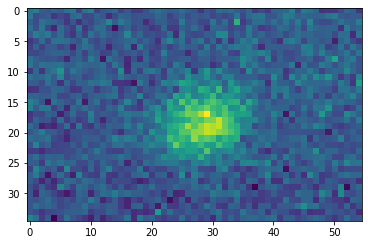

In [12]:
# Load the .cdf file
dataset = nc.Dataset(file_path, 'r')

# Extract the image data (replace 'mean' with the specific variable you want to visualize)
images = dataset.variables['mean'][:]

plt.figure()
plt.imshow(images[5, 0, :, :])

# Close the dataset
dataset.close()

In [49]:
# shots = dataset.variables['mean'][:]
# Define a 1D Gaussian function for fitting
def gaussian(x, amplitude, x0, sigma, offset):
    return amplitude * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2)) + offset

# Load the .cdf file
dataset = nc.Dataset(file_path, 'r')

# Extract relevant variables
jmin = dataset.j_min  # Example placeholder for the actual extraction
jmax = dataset.j_max  # Example placeholder for the actual extraction

jarr = np.arange(jmin, jmax)
nshots = len(jarr)

Expansion_times = np.asarray(-10 - jarr * 2)

# Initialize arrays to store fitting results
total_fluorescence_x = np.zeros(nshots)
total_fluorescence_y = np.zeros(nshots)
sigma_x = np.zeros(nshots)
sigma_y = np.zeros(nshots)
sigma_x_err = np.zeros(nshots)
sigma_y_err = np.zeros(nshots)
mu_x = np.zeros(nshots)
mu_y = np.zeros(nshots)
mu_x_err = np.zeros(nshots)
mu_y_err = np.zeros(nshots)


for i in range(nshots):
    print('Processing shot:', i)
    # Load and display the mean image data
    image = dataset.variables['mean'][i, 0, :, :]
    # plt.imshow(image)
    # plt.show()
    
    # Fit Gaussian to the sum of the image data along the x-axis
    summed_x = image.sum(axis=0)
    x_coords = np.arange(summed_x.shape[0])
    # plt.plot(x_coords, summed_x)
    # plt.show()
    popt_x, pcov_x = curve_fit(gaussian, x_coords, summed_x, p0=[1000, 690, 8, 200])
    # print(popt_x)
    total_fluorescence_x[i] = np.sqrt(2 * np.pi) * popt_x[0] * popt_x[2]
    mu_x[i] = popt_x[1]
    mu_x_err[i] = np.sqrt(pcov_x[1, 1])
    sigma_x[i] = popt_x[2]
    sigma_x_err[i] = np.sqrt(pcov_x[2, 2])
    
    # Fit Gaussian to the sum of the image data along the y-axis
    summed_y = image.sum(axis=1)
    y_coords = np.arange(summed_y.shape[0])
    popt_y, pcov_y = curve_fit(gaussian, y_coords, summed_y, p0=[1000, 520, 19, 800])
    total_fluorescence_y[i] = np.sqrt(2 * np.pi) * popt_y[0] * popt_y[2]
    mu_y[i] = popt_y[1]
    mu_y_err[i] = np.sqrt(pcov_y[1, 1])
    sigma_y[i] = popt_y[2]
    sigma_y_err[i] = np.sqrt(pcov_y[2, 2])

# Adjust offsets
mu_x -= mu_x[1]
mu_y -= mu_y[1]

# Output results
print("Expansion times:", Expansion_times)
print("Sigma_x:", sigma_x)
print("Sigma_y:", sigma_y)

# Close the dataset
dataset.close()

Processing shot: 0
Processing shot: 1
Processing shot: 2
Processing shot: 3
Processing shot: 4
Processing shot: 5
Processing shot: 6
Processing shot: 7
Processing shot: 8
Processing shot: 9
Processing shot: 10
Processing shot: 11
Processing shot: 12
Processing shot: 13
Processing shot: 14
Processing shot: 15
Processing shot: 16
Processing shot: 17
Processing shot: 18
Processing shot: 19
Processing shot: 20
Processing shot: 21
Processing shot: 22
Processing shot: 23
Processing shot: 24
Processing shot: 25
Processing shot: 26
Processing shot: 27
Processing shot: 28
Processing shot: 29
Processing shot: 30
Processing shot: 31
Processing shot: 32
Processing shot: 33
Processing shot: 34
Processing shot: 35
Processing shot: 36
Processing shot: 37
Processing shot: 38
Processing shot: 39
Processing shot: 40
Processing shot: 41
Processing shot: 42
Processing shot: 43
Processing shot: 44
Processing shot: 45
Expansion times: [ -10  -12  -14  -16  -18  -20  -22  -24  -26  -28  -30  -32  -34  -36
  

/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_4125/1739769158.py:43: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_x, pcov_x = curve_fit(gaussian, x_coords, summed_x, p0=[1000, 690, 8, 200])
/var/folders/h6/9mpjzmxd77l7493g4210phz00000gn/T/ipykernel_4125/1739769158.py:54: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_y, pcov_y = curve_fit(gaussian, y_coords, summed_y, p0=[1000, 520, 19, 800])


In [54]:

# Initialize lists to hold fluorescence data for different expansion times
flour_arrays_x = []
flour_arrays_y = []

# Count the number of valid scans
count = 0

# Loop over all expansion times to organize fluorescence data
for i in range(len(Expansion_times)):
    if Expansion_times[i] == 0:
        # When expansion time is 0, start a new scan
        count += 1
        new_scan_x = []
        new_scan_y = []
        flour_arrays_x.append(new_scan_x)
        flour_arrays_y.append(new_scan_y)
        print(f"Starting new scan at index {i}, count = {count}")
    elif Expansion_times[i] != 10:
        # Check if the current count index is within bounds
        if count > 0:
            # Append the fluorescence data to the current scan
            flour_arrays_x[count - 1].append(total_fluorescence_x[i])
            flour_arrays_y[count - 1].append(total_fluorescence_y[i])
        else:
            print(f"Error: Count is 0 at index {i}. Cannot append data.")
    else:
        print(f"Skipping index {i} due to Expansion_times value.")

# Check if any valid scans were collected
if count == 0 or not flour_arrays_x:
    print("No valid scans were found. Check the Expansion_times and data.")
else:
    # Initialize arrays to hold the total fluorescence data
    # Ensure the arrays are initialized to the correct size based on the first scan
    total_flour_x = np.zeros(len(flour_arrays_x[0]))
    total_flour_y = np.zeros(len(flour_arrays_y[0]))

    # Accumulate fluorescence data for averaging
    for i in range(count):
        total_flour_x += np.array(flour_arrays_x[i])
        total_flour_y += np.array(flour_arrays_y[i])

    # Compute the average fluorescence data
    avg_flour_x = total_flour_x / count
    avg_flour_y = total_flour_y / count

    # Optional: Print results for verification
    print("Average Fluorescence X:", avg_flour_x)
    print("Average Fluorescence Y:", avg_flour_y)


Error: Count is 0 at index 0. Cannot append data.
Error: Count is 0 at index 1. Cannot append data.
Error: Count is 0 at index 2. Cannot append data.
Error: Count is 0 at index 3. Cannot append data.
Error: Count is 0 at index 4. Cannot append data.
Error: Count is 0 at index 5. Cannot append data.
Error: Count is 0 at index 6. Cannot append data.
Error: Count is 0 at index 7. Cannot append data.
Error: Count is 0 at index 8. Cannot append data.
Error: Count is 0 at index 9. Cannot append data.
Error: Count is 0 at index 10. Cannot append data.
Error: Count is 0 at index 11. Cannot append data.
Error: Count is 0 at index 12. Cannot append data.
Error: Count is 0 at index 13. Cannot append data.
Error: Count is 0 at index 14. Cannot append data.
Error: Count is 0 at index 15. Cannot append data.
Error: Count is 0 at index 16. Cannot append data.
Error: Count is 0 at index 17. Cannot append data.
Error: Count is 0 at index 18. Cannot append data.
Error: Count is 0 at index 19. Cannot app